# <font color="blue"> **Introduction to Network Analysis** </font>



Notebook prepared for the:
<blockquote>

**Méthodes quantitatives en sciences humaines (et santé) 2025**


2025 June5-6, Montréal, Canada
</blockquote>


**Author:**
* Patrick Desrosiers


**Introduction:**

Network science has become a powerful framework for analyzing complex relational data in the social sciences, health, and neuroscience. By modeling interactions—between individuals, symptoms, or brain regions—as mathematical graphs, it enables the study of structure, influence, and dynamics across multiple levels of analysis. In neuroscience, this approach has supported major advances in understanding brain organization and development, while in health and the social sciences, it provides tools to study phenomena such as social support, comorbidity patterns, and the diffusion of behaviors or information ([Bassett et al., 2017](https://doi.org/10.1038/nn.4502); [Barabási et al., 2023](https://doi.org/10.1523/JNEUROSCI.1014-23.2023)).


Here, using the Python library [NetworkX](https://networkx.org/), we will:
* explore graph representations,
* analyze graph features,
* simulate synthetic connectomes,
* compare functional and structural connectomes.

### **Table of Contents**

<details>
<summary><strong>1. Graphs</strong></summary>

- 1.1 Definitions  
- 1.2 NetworkX  
  - 1.2.1 Visual display  
  - 1.2.2 Matrix Representation  
  - 1.2.3 Visualization of weighted and directed graphs  
  - 1.2.4 Random weighted and directed graphs  

</details>



<details>
<summary><strong>2. Graph Metrics</strong></summary>

- 2.1 Density  
- 2.2 Transitivity (global clustering coefficient)  
- 2.3 Shortest path length  
  - Network Efficiency  
- 2.4 Degrees  
  - Degree-preserving random graphs  
- 2.5 Further graph metrics  
  - Small-world property  
  - Motifs  
  - Rich-Club Coefficient  
  - Modularity  
  - Singular Values and Effective Ranks  
  - Exercise: Mesoscale SC of the mouse brain  
  - Exercise: Microscopic SC of the larval drosophila  

</details>


<details>
<summary><strong>3. Complementary References</strong></summary>

</details>


### Python Environment Setup

In [1]:
# Setup: install required Python packages (only needed once, e.g., in Google Colab) silently
!pip install -q networkx numpy scipy python-louvain seaborn pandas > /dev/null 2>&1

# Import required packages using standard abbreviations and print versions
# Load modules for computation and data analysis
import networkx as nx
import numpy as np
import scipy as sp
import pandas as pd
import community  

print("networkx:", nx.__version__)
print("numpy:", np.__version__)
print("scipy:", sp.__version__)
print("pandas:", pd.__version__)
print("python-louvain:", community.__version__)

# Load modules for plotting and visualization
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
print("matplotlib:", matplotlib.__version__)
print("seaborn:", sns.__version__)


networkx: 3.1
numpy: 1.24.3
scipy: 1.10.0
pandas: 1.4.4
python-louvain: 0.16
matplotlib: 3.7.2
seaborn: 0.13.2


## <font color="blue"> **1. Graphs** </font>

### <font color="black"> **1.1 Definitions** </font>

A graph is a mathematical structure used to model pairwise relations between objects. It is composed of two main components:

1. **Vertices (or Nodes):** These are the fundamental units or points in the graph. Each vertex can represent various entities such as people in a social network, web pages on the internet, or neurons in a brain network.

2. **Edges (or Links):** These are the connections between pairs of vertices. An edge can represent a relationship, interaction, or a direct connection between two vertices. Edges can be undirected (no direction, indicating a mutual relationship) or directed (with direction, indicating a one-way relationship).

<figure>
    <img src="https://networkx.org/documentation/stable/_images/sphx_glr_plot_simple_graph_001.png" alt="Simple graph" width="300"/>
    <figcaption>Figure 1: Simple Graph with $N=5$ vertices, $M=6$ edges, and density 0.6.  </figcaption>
</figure>

Graph theory provides a rich set of tools and metrics to analyze these networks, such as connectivity patterns, network robustness, efficiency of information transfer, and centrality measures. This analysis helps to uncover the underlying architecture of brain networks and their role in neural function.

One of the basic **features (properties or metrics)** of a graph is its overall connectivity or **density**, measured as the ratio of the number of edges present to the number of possible edges between nodes in the graph:

$$
\text{density} = \frac{\text{number of edges}}{\text{number of possible edges}}=\frac{2M}{N(N-1)},
$$

where $M$ and $N$ denote the number of edges and nodes, respectively.

Types of Graphs:

- **Undirected Graph:** A graph in which edges have no direction. If vertex A is connected to vertex B, then vertex B is also connected to vertex A.
- **Directed Graph (Digraph):** A graph in which edges have a direction. An edge from vertex A to vertex B does not imply an edge from vertex B to vertex A.
- **Weighted Graph:** A graph in which each edge has a numerical value (weight) associated with it. This can represent distances, costs, or other quantities.
- **Unweighted Graph:** A graph in which all edges are considered equal, with no specific weight assigned to them.

<figure>
    <img src="https://raw.githubusercontent.com/pdesrosiers/public_data/main/images/graph_types.png" alt="Connectome" width="800"/>
</figure>


For simplicity, we will first focus on undirected graphs, starting with unweighted graphs, and then introduce weights and directed edges.

### **1.2 NetworkX**
NetworkX is a Python library used for the creation, manipulation, and study of complex networks and graphs. It provides tools for analyzing the structure and dynamics of networks, offering various algorithms for network analysis and a wide range of built-in graph layouts for visualization.

In [2]:
# Load module for working with graphs
import networkx as nx

In [3]:
# Create a nx graph object
G = nx.Graph()   # Create an empty undirected graph
G.add_edge(1, 2) # Add the edge (1,2)
G.add_edge(1, 3)
G.add_edge(1, 5)
G.add_edge(2, 3)
G.add_edge(3, 4)
G.add_edge(4, 5)

# Count the nodes and edges
num_nodes = nx.number_of_nodes(G)
num_edges = nx.number_of_edges(G)

# Print the results
print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")


Number of nodes: 5
Number of edges: 6


<h4><font color="magenta">💻 <strong>Exercise:</strong></font></h4>

<div style="background-color:#f8f9fa; border-left: 4px solid #ccc; padding: 10px; margin: 10px 0;">
Modify the graph by adding <strong>two new edges</strong>:
<ul>
  <li>One edge that connects two <strong>existing nodes</strong> already in the graph.</li>
  <li>One edge that introduces a <strong>new node</strong> (a node that doesn't currently exist in the graph).</li>
</ul>
Then, print the updated number of <strong>nodes</strong> and <strong>edges</strong>.
</div>

<details>
<summary>🔎 Hint</summary>

Use <code>G.add_edge</code> twice and <code>nx.number_of_nodes</code> and <code>nx.number_of_edges</code> .

</details>

#### **1.2.1 Visual display**

NetworkX offers many possibilities for displaying graphs, each with its own advantages and limitations.

- **Random Layout**: Positions nodes randomly in the graph space, providing a quick and unstructured visualization. *Advantage*: Simple and fast to compute. *Limitation*: Can be cluttered and lacks meaningful structure.
- **Circular Layout**: Arranges nodes in a circle, highlighting the overall structure and making it easy to identify certain types of symmetries and clusters. *Advantage*: Clearly shows node distribution and symmetrical patterns. *Limitation*: Can be less informative for large or complex networks.
- **Force-Directed (Spring) Layout**: Models the graph using repulsive forces between nodes and attractive forces along edges, similar to charged particles and springs. Nodes are iteratively adjusted until the system reaches equilibrium, minimizing edge crossings and distributing nodes evenly. *Advantage*: Provides an intuitive visualization that highlights clusters and relationships. *Limitation*: Computationally intensive for large graphs.

Here is a random layout of the previously defined graph using NetworkX functions `nx.random_layout`, `nx.draw_networkx_nodes` , `nx.draw_networkx_edges`.

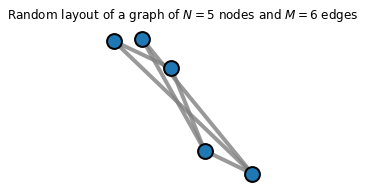

In [4]:


# Random layout
plt.figure(figsize=(3,3))
pos = nx.random_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=220, edgecolors='black', linewidths=2)
nx.draw_networkx_edges(G, pos, alpha=0.8, edge_color='grey', width=4.0)
plt.title(f'Random layout of a graph of $N={nx.number_of_nodes(G)}$ nodes and $M={nx.number_of_edges(G)}$ edges')
plt.axis('off')
plt.show()


<h4><font color="magenta">💻 <strong>Exercise:</strong></font></h4>

<div style="background-color:#f8f9fa; border-left: 4px solid #ccc; padding: 10px; margin: 10px 0;">
Change the above code to use:
<ul>
  <li><strong>White circles</strong> around the nodes</li>
  <li><strong>Blue edges</strong></li>
  <li>Use the option <code>node_color='red'</code> to make the nodes red</li>
</ul>
Observe how these style changes affect the graph's appearance.
</div>


#### **First random graphs**

Below, we will randomly generate a graph $N=12$ nodes and $M=28$ edges using `nx.gnm_random_graph` and then visualize the graph them in three different ways. Each time you run the code, you get a different graph and a different representation.

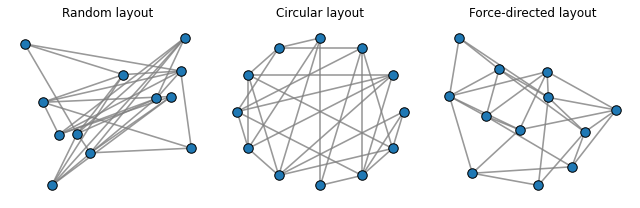

In [5]:
# Draw randomly a graph
N = 12
M = 28
G = nx.gnm_random_graph(N, M, directed= False) # If directed = True, then the graph is directed

# Plot the graph with different layouts
# Create a figure with subplots
fig, axs = plt.subplots(1, 3, figsize=(9, 3))

# Random layout
pos = nx.random_layout(G)
axs[0].set_title('Random layout')
nx.draw_networkx_nodes(G, pos, ax=axs[0], node_size=90, edgecolors='black', linewidths=1)
nx.draw_networkx_edges(G, pos, ax=axs[0], alpha=0.8, edge_color='grey', width=1.6)
axs[0].axis('off')

# Circular layout
pos = nx.circular_layout(G)
axs[1].set_title('Circular layout')
nx.draw_networkx_nodes(G, pos, ax=axs[1], node_size=90, edgecolors='black', linewidths=1)
nx.draw_networkx_edges(G, pos, ax=axs[1], alpha=0.8, edge_color='grey', width=1.6)
axs[1].axis('off')

# Force-directed layout
pos = nx.spring_layout(G, k=0.75)  # Smaller k value for more repulsion
axs[2].set_title('Force-directed layout')
nx.draw_networkx_nodes(G, pos, ax=axs[2], node_size=90, edgecolors='black', linewidths=1)
nx.draw_networkx_edges(G, pos, ax=axs[2], alpha=0.8, edge_color='grey', width=1.6)
axs[2].axis('off')

# Display the plots
plt.tight_layout()
plt.show()


These visual representations are all **geometrically different**, but they are **topologically equivalent** since they preserve the exact pattern of connections between the nodes.

#### **1.2.2 Matrix Representation**

An **adjacency matrix** is a square matrix used to represent a graph. The elements of the matrix indicate whether pairs of vertices are adjacent or not in the graph. Given a graph $G$ with $N$ vertices, its adjacency matrix $ A $ is a $ N \times N $ matrix whose entry in the $i$-th row and $j$-th column, denoted $A_{ij}$,  is be defined as:
$$
A_{ij} =
\begin{cases}
1 & \text{if there is an edge between vertex } i \text{ and vertex } j, \\
0 & \text{otherwise.}
\end{cases}
$$
For undirected graphs, since the edge between vertex $i$ and vertex $j$ is the same as between vertex $j$ and vertex $i$, the matrix is symmetric:
$$
A_{ij} = A_{ji}.
$$


For instance, the adjacency matrix corresponding to the graph in Figure 1 is written as:
$$
A = \begin{pmatrix}
0 & 1 & 1 & 0 & 1 \\
1 & 0 & 1 & 0 & 0 \\
1 & 1 & 0 & 1 & 0 \\
0 & 0 & 1 & 0 & 1 \\
1 & 0 & 0 & 1 & 0 \\
\end{pmatrix}
$$
This matrix shows a '1' wherever there is a direct connection between nodes, and '0' otherwise. The matrix is symmetric, indicating that the graph is undirected.

##### **Getting a matrix from a graph**

In [6]:
# Get the adjacency matrix as a SciPy sparse matrix (zeros are not recorded)
A = nx.adjacency_matrix(G)

# Convert it to a NumPy array if you prefer working with NumPy
A = A.toarray()
print("Adjacency Matrix:\n", A)

Adjacency Matrix:
 [[0 0 0 0 0 0 0 0 1 0 1 1]
 [0 0 0 0 0 1 1 1 1 0 1 0]
 [0 0 0 0 1 0 1 0 0 1 1 1]
 [0 0 0 0 1 0 0 1 1 1 0 0]
 [0 0 1 1 0 1 1 0 0 0 0 0]
 [0 1 0 0 1 0 0 1 1 0 0 1]
 [0 1 1 0 1 0 0 1 0 0 1 0]
 [0 1 0 1 0 1 1 0 1 0 0 0]
 [1 1 0 1 0 1 0 1 0 0 0 1]
 [0 0 1 1 0 0 0 0 0 0 1 0]
 [1 1 1 0 0 0 1 0 0 1 0 1]
 [1 0 1 0 0 1 0 0 1 0 1 0]]


We will now modify the last example to assign a weight to each edge, hence modifying its adjacency matrix. We will also verify that the resulting weighted adjacency matrix is symmetric.

In [7]:
# Assign random weights to each edge
for (u, v) in G.edges():
    G.edges[u, v]['weight'] = np.random.rand()

# Get the adjacency matrix as a NumPy array
A = (nx.adjacency_matrix(G)).toarray()

print("Adjacency Matrix:\n", A)

# Test whether the matrix is symmetric
is_symmetric = np.allclose(A, A.T, atol=1e-9)  # A.T is the transpose of A
print(f"\nAdjacency matrix is symmetric: {is_symmetric}")


Adjacency Matrix:
 [[0.         0.         0.         0.         0.         0.
  0.         0.         0.88838842 0.         0.24272693 0.23488161]
 [0.         0.         0.         0.         0.         0.11925067
  0.24157213 0.36523577 0.7916349  0.         0.01868432 0.        ]
 [0.         0.         0.         0.         0.77146661 0.
  0.43841829 0.         0.         0.15531779 0.71935629 0.03705862]
 [0.         0.         0.         0.         0.28815155 0.
  0.         0.99014056 0.11395278 0.96360492 0.         0.        ]
 [0.         0.         0.77146661 0.28815155 0.         0.15045282
  0.70328531 0.         0.         0.         0.         0.        ]
 [0.         0.11925067 0.         0.         0.15045282 0.
  0.         0.11728779 0.13308184 0.         0.         0.83862167]
 [0.         0.24157213 0.43841829 0.         0.70328531 0.
  0.         0.75809128 0.         0.         0.00449348 0.        ]
 [0.         0.36523577 0.         0.99014056 0.         0.117

##### **Getting graph from a matrix**

As shown below, you can also define a graph directely from a matrix, with or without weights.

In [8]:
H = nx.Graph(A)

<h4><font color="magenta">💻  <strong>Exercise:</strong></font></h4>

<div style="background-color:#f8f9fa; border-left: 4px solid #ccc; padding: 10px; margin: 10px 0;">
Verify that the graphs <code>G</code> and <code>H</code> created above have the <strong>same number of nodes</strong> and the <strong>same number of edges</strong>.
</div>

<details>
<summary>🔎 Hint</summary>

Use <code>nx.number_of_nodes(G)</code> and <code>nx.number_of_edges(G)</code> for both graphs and compare.

</details>

<details>
<summary>✅ Solution</summary>

```python
# Compare number of nodes
same_nodes = G.number_of_nodes() == H.number_of_nodes()

# Compare number of edges
same_edges = G.number_of_edges() == H.number_of_edges()

print("Same number of nodes:", same_nodes)
print("Same number of edges:", same_edges)


#### **1.2.3 Visualization of weighted and directed graphs**

We first go back to the previous example where the graph is weighted and represent the weights using the thickness of the edges.

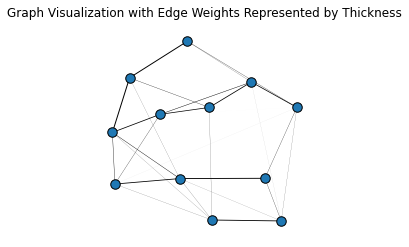

In [9]:
## Visualize the weighted graph
plt.figure(figsize=(4,4))

# Extract weights for visualization
weights = 40*[G[u][v]['weight'] for u, v in G.edges()]

# Draw the graph with edge thickness corresponding to weights
pos = nx.spring_layout(G)  # Positions for all nodes

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=90, edgecolors='black', linewidths=1)

# Draw edges with varying thickness
nx.draw_networkx_edges(G, pos, width=weights)

plt.title("Graph Visualization with Edge Weights Represented by Thickness")
plt.axis('off')
plt.show()

In all revious examples, graph were undirected. We now go back to the very first example and create a directed graph.

In [10]:
# Create a nx graph object
G = nx.DiGraph()   # Create an empty directed graph
G.add_edge(1, 2) # Add the directed edge (1,2)
G.add_edge(1, 3)
G.add_edge(1, 5)
G.add_edge(2, 3)
G.add_edge(3, 4)
G.add_edge(4, 5)

<h4><font color="magenta">💻 <strong>Exercise:</strong></font></h4>

<div style="background-color:#f8f9fa; border-left: 4px solid #ccc; padding: 10px; margin: 10px 0;">
Extract the <strong>adjacency matrix</strong> of the graph as a <code>numpy</code> array and check whether it is <strong>asymmetric</strong>.
<br><br>
How could you modify the graph (e.g., by adding edges) to make the adjacency matrix <strong>symmetric</strong>?
</div>

<details>
<summary>🔍 Hint</summary>

- Use `A = nx.to_numpy_array(G)` to extract the adjacency matrix as a NumPy array.
- To check symmetry, compare the matrix with its transpose using `np.allclose(A, A.T)`.
- A graph with a **symmetric adjacency matrix** corresponds to an **undirected** graph.

</details>

<details>
<summary>✅ Solution</summary>

```python
import numpy as np

# Convert graph to numpy adjacency matrix
A = nx.to_numpy_array(G)

# Check symmetry
is_symmetric = np.allclose(A, A.T)

print("Adjacency matrix is symmetric:", is_symmetric)

# Optional: how to make it symmetric
# You can symmetrize the adjacency matrix manually like this:
A_symmetric = (A + A.T) / 2

# Or create an undirected version of the graph:
G_symmetric = G.to_undirected()


#### **1.2.4 Random weighted and directed graphs**

Below, we **randomly select a directed graph with a given number of vertices and edges**. We also randomly attribute a weight to each edge.

The `gnm_random_graph(n, m)` model in NetworkX generates a random graph by:

- Drawing a graph with exactly **n nodes** and **m edges**.
- Selecting **m random pairs of nodes** to connect.
- Optionally, the graph can be **directed** by passing `directed=True`.

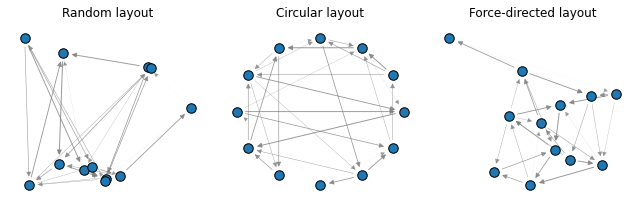

In [11]:
# Draw randomly a directed graph (digraph)
N = 12
M = 28
G = nx.gnm_random_graph(N, M, directed= True)

# Assign random weights to each edge
for (u, v) in G.edges():
    G.edges[u, v]['weight'] = np.random.rand()

# Extract weights for visualization
weights = 40*[G[u][v]['weight'] for u, v in G.edges()]

# Plot the graph with different layouts
# Create a figure with subplots
fig, axs = plt.subplots(1, 3, figsize=(9, 3))

# Random layout
pos = nx.random_layout(G)
axs[0].set_title('Random layout')
nx.draw_networkx_nodes(G, pos, ax=axs[0], node_size=90, edgecolors='black', linewidths=1)
nx.draw_networkx_edges(G, pos, ax=axs[0], alpha=0.8, edge_color='grey', width=weights)
axs[0].axis('off')

# Circular layout
pos = nx.circular_layout(G)
axs[1].set_title('Circular layout')
nx.draw_networkx_nodes(G, pos, ax=axs[1], node_size=90, edgecolors='black', linewidths=1)
nx.draw_networkx_edges(G, pos, ax=axs[1], alpha=0.8, edge_color='grey', width=weights)
axs[1].axis('off')

# Force-directed layout
pos = nx.spring_layout(G, k=0.75)  # Smaller k value for more repulsion
axs[2].set_title('Force-directed layout')
nx.draw_networkx_nodes(G, pos, ax=axs[2], node_size=90, edgecolors='black', linewidths=1)
nx.draw_networkx_edges(G, pos, ax=axs[2], alpha=0.8, edge_color='grey', width=weights)
axs[2].axis('off')

# Display the plots
plt.tight_layout()
plt.show()

Below, we illustrate the adjacency matrix and show that it's not symmetric.

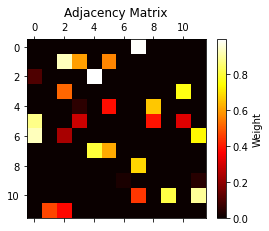


Adjacency matrix is symmetric: False


In [12]:
# Compute and plot the adjacency matrix
A = nx.to_numpy_array(G)

# Plot the adjacency matrix
plt.matshow(A, cmap='hot')
plt.title('Adjacency Matrix')
plt.colorbar(label='Weight',shrink=0.8)
plt.show()

# Check whether the adjacency matrix is symmetric
is_symmetric = np.allclose(A, A.T, atol=1e-8)
print(f"\nAdjacency matrix is symmetric: {is_symmetric}")

<h4><font color="magenta">💻 <strong>Optional exercise:</strong></font></h4>

<div style="background-color:#f8f9fa; border-left: 4px solid #ccc; padding: 10px; margin: 10px 0;">
Modify the graph generation line to produce an <strong>undirected</strong> version of the same graph.
<br><br>
<ul>
  <li>Only change <strong>one line</strong>.</li>
  <li>Then re-run the notebook cells and observe:</li>
  <ul>
    <li>How the <strong>visual layout</strong> changes.</li>
    <li>How the <strong>adjacency matrix</strong> differs.</li>
    <li>Whether the matrix is now <strong>symmetric</strong>.</li>
  </ul>
</ul>
</div>


<details>
<summary>🔍 Hint</summary>

-  `1/2*(A + A.T) ` is symmetric.

</details>

### **1.2 Network Data**

#### **1.2.1 Data included in NetworkX** 

`NetworkX` includes several built-in network datasets that are ideal for learning and experimentation in social, historical, and literary contexts.

Explore these classic examples:

- `nx.karate_club_graph()`  
  → Friendship network in a university karate club (Zachary, 1977). Useful for community detection.

- `nx.davis_southern_women_graph()`  
  → Bipartite graph of women and events attended in 1930s. Great for affiliation analysis.

- `nx.florentine_families_graph()`  
  → Marriage ties among Renaissance Florentine families. Useful for studying power and centrality.

- `nx.les_miserables_graph()`  
  → Co-occurrence of characters in *Les Misérables*. A weighted graph for narrative networks.

In [13]:
import networkx as nx
import pandas as pd

# Define classic graphs
graphs = {
    "Karate Club": nx.karate_club_graph(),
    "Southern Women": nx.davis_southern_women_graph(),
    "Florentine Families": nx.florentine_families_graph(),
    "Les Misérables": nx.les_miserables_graph()
}

# Build data for the table
data = []

for name, G in graphs.items():
    n = G.number_of_nodes()
    m = G.number_of_edges()
    kind = "Directed" if G.is_directed() else "Undirected"
    if nx.is_weighted(G):
        kind += " + Weighted"
    if nx.is_bipartite(G):
        kind += " + Bipartite"
    data.append({"Graph": name, "Nodes": n, "Edges": m, "Type": kind})

# Create and display DataFrame
df = pd.DataFrame(data)
df

,Graph,Nodes,Edges,Type
0,Karate Club,34,78,Undirected + Weighted
1,Southern Women,32,89,Undirected + Bipartite
2,Florentine Families,15,20,Undirected
3,Les Misérables,77,254,Undirected + Weighted


<h4><font color="magenta">🌐 <strong>Exercise:</strong></font></h4>

> Visit the [**Netzschleuder network catalogue and repository**](https://networks.skewed.de/) and try searching for keywords relevant to your field, such as  
> - `social` (e.g., social networks, collaboration, friendship)
> - `health` (e.g., comorbidity, disease transmission)
> - `connectome` (for brain networks)  
>
> Choose a network dataset and consider the following:
> - What are the **nodes** and **edges** representing?
> - Is the network **directed** or **weighted**?
> - What kind of questions could this network help you investigate in your domain?

#### **Build graph and visual display in NetworkX**

We now focus on Zachary’s Karate Club Dataset. This classic social network dataset represents friendships between 34 members of a university karate club observed over two years by Wayne Zachary (1977). Each node is a member, and an edge represents a social interaction outside of the club's official activities. Edge weights reflect the number of recorded interactions between members, providing a simple measure of tie strength.

The network became famous because a conflict, between the club's instructor ("Mr. Hi") and the administrator ("Officer"), eventually split the club into two factions. It is often used to illustrate concepts such as community detection and centrality, as well as to benchmark clustering algorithms.

Number of nodes: 34
Number of edges: 78


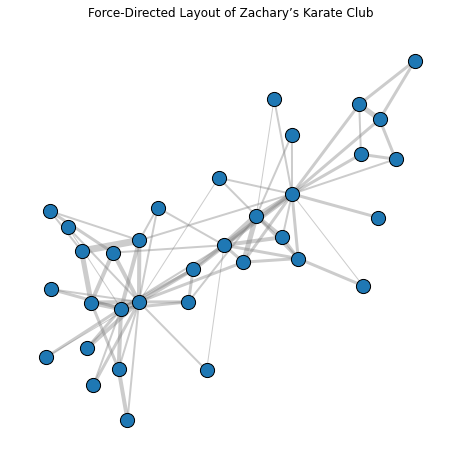

In [14]:
# Create a graph
G = nx.karate_club_graph()

# Count nodes and edges, measure density
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")

# Extract edge weights
edge_weights = [G[u][v]['weight'] for u, v in G.edges()]

# Plot the graph with force-directed layout
plt.figure(figsize=(8,8))
pos = nx.spring_layout(G, k=0.4)  # Smaller k value for more repulsion
nx.draw_networkx_nodes(G, pos, node_size=200, edgecolors='black', linewidths=1)
nx.draw_networkx_edges(G, pos, alpha=0.4, edge_color='grey', width=edge_weights )
plt.title('Force-Directed Layout of Zachary’s Karate Club')
plt.axis('off')
plt.show()

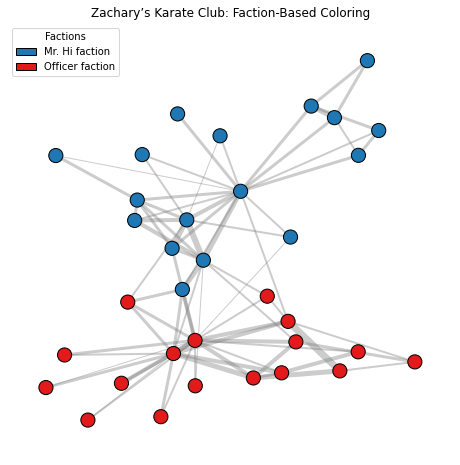

In [15]:
from matplotlib.patches import Patch

# Assign a color to each faction
faction_colors = {
    'Mr. Hi': '#1f78b4',     # blue
    'Officer': '#e31a1c'     # red
}
node_colors = [faction_colors[G.nodes[n]['club']] for n in G.nodes()]

# Plot with force-directed layout
plt.figure(figsize=(8, 8))
pos = nx.spring_layout(G, k=0.4, seed=42)
nx.draw_networkx_nodes(G, pos, node_size=200, node_color=node_colors,
                       edgecolors='black', linewidths=1)
nx.draw_networkx_edges(G, pos, alpha=0.4, edge_color='grey', width=edge_weights)
# Add legend
legend_elements = [
    Patch(facecolor='#1f78b4', edgecolor='black', label='Mr. Hi faction'),
    Patch(facecolor='#e31a1c', edgecolor='black', label='Officer faction')
]
plt.legend(handles=legend_elements, loc='upper left', title='Factions')
plt.title("Zachary’s Karate Club: Faction-Based Coloring")
plt.axis('off')
plt.show()


#### **1.2.2 Online data** 

Here is an example showing how to download data using a url address and build the corresponding graph. 

⚠️ Local file not found. Attempting to download from GitHub...
✅ Downloaded and loaded adjacency matrix from GitHub.
Adjacency matrix shape: (70, 70)


<Figure size 576x576 with 0 Axes>

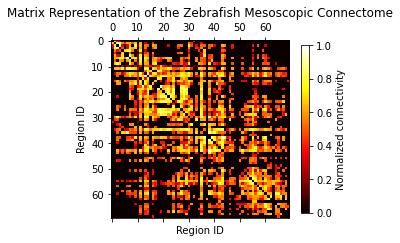

In [16]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Define expected local path (relative to notebook in /notebooks/)
local_path = '../data/zebrafish/SC_undirected.npy'

# Define fallback URL (raw GitHub file for Colab or other environments)
url = 'https://github.com/pdesrosiers/brain-connectivity-and-dynamics/raw/main/data/zebrafish/SC_undirected.npy'
downloaded_filename = 'SC_undirected.npy'  # Name to use if downloading

# Try loading locally
try:
    adjacency_matrix = np.load(local_path, allow_pickle=True)
    print("✅ Loaded adjacency matrix from local file.")
except FileNotFoundError:
    print("⚠️ Local file not found. Attempting to download from GitHub...")
    import urllib.request
    urllib.request.urlretrieve(url, downloaded_filename)
    adjacency_matrix = np.load(downloaded_filename, allow_pickle=True)
    print("✅ Downloaded and loaded adjacency matrix from GitHub.")

# Confirm shape
print("Adjacency matrix shape:", adjacency_matrix.shape)

# Plot the matrix
plt.figure(figsize=(8, 8))
plt.matshow(adjacency_matrix, cmap='hot')
plt.title('Matrix Representation of the Zebrafish Mesoscopic Connectome')
plt.colorbar(label='Normalized connectivity', shrink=0.75)
plt.xlabel('Region ID')
plt.ylabel('Region ID')
plt.show()



<h4><font color="magenta">💻 <strong>Exercise:</strong></font></h4>

> Build a graph from `adjacency_matrix` and compute its number of nodes and edges.

<details>
<summary>✅ Solution</summary>

```python
G=nx.Graph(adjacency_matrix)
# Count nodes and edges, measure density
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")
```

⚠️ Local file not found. Attempting to download from GitHub...
✅ Downloaded and loaded top_projection from GitHub.
⚠️ Local file not found. Attempting to download from GitHub...
✅ Downloaded and loaded side_projection from GitHub.


<Figure size 864x504 with 0 Axes>

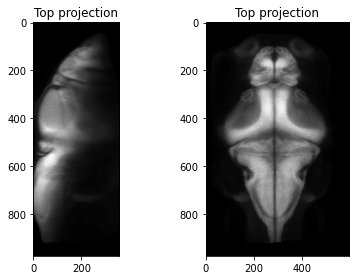

In [17]:
# Download and load top projection of the zebrafish brain

# Define expected local path
local_path = '../data/zebrafish/top_projection.npy'

# Define fallback URL (raw GitHub file for Colab or other environments)
url = 'https://github.com/pdesrosiers/brain-connectivity-and-dynamics/raw/main/data/zebrafish/top_projection.npy'
downloaded_filename = 'top_projection.npy'  # Name to use if downloading

# Try loading locally
try:
    top_projection = np.load(local_path, allow_pickle=True)
    print("✅ Loaded top_projection from local file.")
except FileNotFoundError:
    print("⚠️ Local file not found. Attempting to download from GitHub...")
    import urllib.request
    urllib.request.urlretrieve(url, downloaded_filename)
    top_projection = np.load(downloaded_filename, allow_pickle=True)
    print("✅ Downloaded and loaded top_projection from GitHub.")


# Download and load side projection of the zebrafish brain

# Define expected local path
local_path = '../data/zebrafish/side_projection.npy'

# Define fallback URL (raw GitHub file for Colab or other environments)
url = 'https://github.com/pdesrosiers/brain-connectivity-and-dynamics/raw/main/data/zebrafish/side_projection.npy'
downloaded_filename = 'side_projection.npy'  # Name to use if downloading

# Try loading locally
try:
    side_projection = np.load(local_path, allow_pickle=True)
    print("✅ Loaded side_projection from local file.")
except FileNotFoundError:
    print("⚠️ Local file not found. Attempting to download from GitHub...")
    import urllib.request
    urllib.request.urlretrieve(url, downloaded_filename)
    side_projection = np.load(downloaded_filename, allow_pickle=True)
    print("✅ Downloaded and loaded side_projection from GitHub.")

from scipy import ndimage
side_projection = ndimage.rotate(side_projection, 90)
side_projection = np.flipud(side_projection)  # Flip the image on the x-axis

# Plot morphological information
plt.figure(figsize=(12,7))
fig, axs = plt.subplots(1, 2)  # Create two subplots
axs[0].imshow(side_projection, cmap='gray')  # Display the second image
axs[0].set_title('Top projection')
axs[1].imshow(top_projection, cmap='gray')  # Display the first image
axs[1].set_title('Top projection')
# Adjust the spacing between subplots
plt.tight_layout()
plt.show()  # Show the plot

In [18]:
# Get xyz positions of nodes
# Define expected local path
local_path = '../data/zebrafish/region_centroids.npy'

# Define fallback URL (raw GitHub file for Colab or other environments)
url = 'https://github.com/pdesrosiers/brain-connectivity-and-dynamics/raw/main/data/zebrafish/region_centroids.npy'
downloaded_filename = 'region_centroids.npy'  # Name to use if downloading

# Try loading locally
try:
    xyz = np.load(local_path, allow_pickle=True)
    print("✅ Loaded region centroids from local file.")
except FileNotFoundError:
    print("⚠️ Local file not found. Attempting to download from GitHub...")
    import urllib.request
    urllib.request.urlretrieve(url, downloaded_filename)
    xyz = np.load(downloaded_filename, allow_pickle=True)
    print("✅ Downloaded and loaded region centroids from GitHub.")


# Create dictionaries for xy and xz positions
xy = xyz[:, 0:2]
xy_dic = {i: xy[i,:] for i in range(70)}
zy = xyz[:, (2,1)]
zy_dic = {i: zy[i,:] for i in range(70)}

⚠️ Local file not found. Attempting to download from GitHub...
✅ Downloaded and loaded region centroids from GitHub.


<details>
<summary>✅ Solution</summary>

```python
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D scatter plot of brain region centroids
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Extract x, y, z coordinates
x, y, z = xyz[:, 0], xyz[:, 1], xyz[:, 2]

# Define colors for left and right hemispheres
colors = ['darkorange'] * 70 + ['steelblue'] * 70

# Plot the nodes with hemisphere-specific colors
sc = ax.scatter(x, y, z, c=colors, s=40, edgecolors='k')

# Annotate a few regions to reduce clutter
for i in [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130]:
    ax.text(x[i], y[i], z[i], f'{i}', fontsize=8, ha='center')

# Labels and appearance
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Scatter Plot of Brain Region Centroids')

plt.tight_layout()
plt.show()
```

<Figure size 1440x720 with 0 Axes>

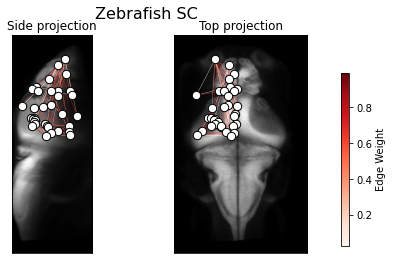

In [19]:
# Define colormap for edges
import matplotlib.cm as cm                # Colormaps
cmap = cm.ScalarMappable(cmap='Reds')

# Plot morphological information and connectome information
plt.figure(figsize=(20, 10))
fig, axs = plt.subplots(1, 2)  # Create two subplots

# Display the second image
axs[0].imshow(side_projection, cmap='gray')  # Display the second image
nx.draw_networkx_nodes(G, zy_dic, ax=axs[0], node_color='white',
                       node_size=70, edgecolors='black', linewidths=1)
nx.draw_networkx_edges(G, zy_dic, ax=axs[0], alpha=0.8,
                       edge_color=cmap.to_rgba(weights), width=0.4)
axs[0].set_title('Side projection')

# Display the first image and the network on the same subplot
axs[1].imshow(top_projection, cmap='gray')  # Display the first image
nx.draw_networkx_nodes(G, xy_dic, ax=axs[1], node_color='white',
                       node_size=70, edgecolors='black', linewidths=1)
nx.draw_networkx_edges(G, xy_dic, ax=axs[1], alpha=0.8,
                       edge_color=cmap.to_rgba(weights), width=0.4)
axs[1].set_title('Top projection')

# Add a global title
plt.suptitle('Zebrafish SC', fontsize=16)

# Add vertical color bar to the left
fig.subplots_adjust(left=0.1, right=0.9)
cbar_ax = fig.add_axes([0.95, 0.15, 0.02, 0.6])  # [left, bottom, width, height]
cbar = plt.colorbar(cmap, cax=cbar_ax, orientation='vertical')
cbar.set_label('Edge Weight')

# Adjust the spacing between subplots
plt.show()  # Show the plot

In [20]:
# Define expected local path
local_path = '../data/zebrafish/region_names.npy'

# Define fallback URL (raw GitHub file for Colab or other environments)
url = 'https://github.com/pdesrosiers/brain-connectivity-and-dynamics/raw/main/data/zebrafish/region_names.npy'
region_names = 'region_names.npy'  # Name to use if downloading

# Try loading locally
try:
    region_names = np.load(local_path, allow_pickle=True)
    print("✅ Loaded region names from local file.")
except FileNotFoundError:
    print("⚠️ Local file not found. Attempting to download from GitHub...")
    import urllib.request
    urllib.request.urlretrieve(url, downloaded_filename)
    region_names = np.load(downloaded_filename, allow_pickle=True)
    print("✅ Downloaded and loaded region names from GitHub.")

# Print region ID and name
print('\n')
for id in range(len(region_names)):
  print(str(id) + ':' + region_names[id])

⚠️ Local file not found. Attempting to download from GitHub...
✅ Downloaded and loaded region names from GitHub.


0:olfactory_epithelium
1:olfactory_bulb
2:ventral_telencephalon_(subpallium)
3:dorsal_telencephalon_(pallium)
4:dorsal_habenula
5:epiphysis
6:ventral_habenula
7:ventral_entopeduncular_nucleus
8:eminentia_thalami_(remaining)
9:preoptic_region
10:retina
11:ventral_thalamus__alar_part
12:torus_longitudinalis
13:dorsal_thalamus_proper
14:pretectum__alar_part
15:stratum_opticum
16:posterior_tuberculum_(basal_part_of_prethalamus_and_thalamus)
17:rostral_hypothalamus
18:stratum_marginale
19:stratum_fibrosum_et_griseum_superficiale
20:sfgs__sgc
21:stratum_griseum_centrale
22:sac__spv
23:stratum_album_centrale
24:medial_tegmentum_(remaining)
25:diffuse_nucleus_of_the_inferior_lobe
26:nucleus_of_the_medial_longitudinal_fascicle_(pretectum_basal_part)
27:lateral_tegmentum
28:periventricular_layer
29:torus_semicircularis
30:intermediate_hypothalamus_(remaining)
31:oculomotor_nucleus
3

## <font color="blue"> **2. Graph Metrics** </font>

We now review some of the most relevant graph metrics and apply them to characterize Zachary’s Karate Club network. 

In [21]:
G = nx.karate_club_graph()

### **2.1 Density**

The density (a.k.a. connectectivity or connection probability $p$) of a graph is a measure of how many edges are present relative to the total number of possible edges between its nodes.

In [22]:
density = nx.density(G)
print(f"Density: {density:.3f}")

Density: 0.139


#### **More random graphs**

The **Erdős–Rényi (ER)** model is a fundamental model of random graphs where each possible edge between a pair of $ N $ nodes is created **independently** with a fixed **probability $ p $**. This version of the model is often referred to as **G(n, p)**.

- In **G(n, p)**, the **expected number of edges** is $ p \cdot \frac{N(N-1)}{2} $ for undirected graphs, or $ p \cdot N(N-1) $ for directed graphs.
- Every edge is formed independently, which means the total number of edges may vary between graph realizations.

This differs from the **G(n, m)** model, where exactly **$ m $** edges are added randomly to the graph. In G(n, m), the total number of edges is fixed in advance, while in G(n, p), the number of edges is a random variable centered around its expected value.

In our case, once the density of the empirical connectome is known, we can use it as the parameter $ p $ in the ER model to generate **random graphs with similar average sparsity**, allowing for useful comparisons with the real brain network.


Density of generated random graph G_random: 0.152



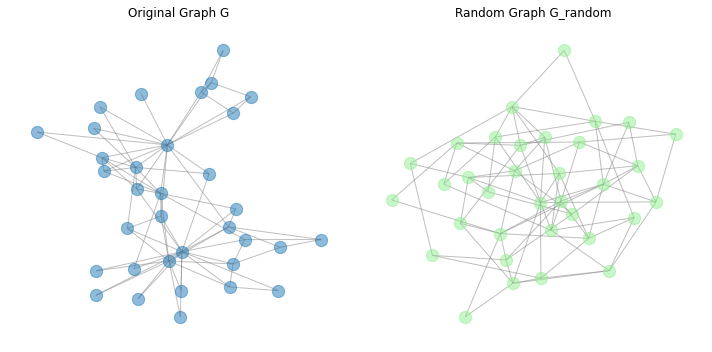

In [23]:
# Generate a random graph with the same number of nodes and density using ER model
N = G.number_of_nodes()  # Number of nodes in graph G
p = density  # Edge probability based on the density of G

# Generate randomly a grapg from the ER model
G_random = nx.erdos_renyi_graph(N, p, directed=False)

# Calculate density of the generated random graph (optional check)
density_random = nx.density(G_random)
print(f"Density of generated random graph G_random: {density_random:.3f}\n")

# Plotting both graphs side by side
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot original graph G
axs[0].set_title('Original Graph G')
pos = nx.spring_layout(G, k=0.2, seed=42)  # Fixed seed and k for layout consistency
nx.draw(G, pos, with_labels=False, edge_color='grey', node_size=150, ax=axs[0],
        alpha=0.5)

# Plot random graph G_random
axs[1].set_title('Random Graph G_random')
pos_random = nx.spring_layout(G_random, k=0.2, seed=42)  # Fixed seed and k for layout consistency
nx.draw(G_random, pos_random, with_labels=False, node_color='lightgreen', edge_color='grey',
        node_size=150, ax=axs[1], alpha=0.5)

plt.tight_layout()
plt.show()

<h4><font color="magenta">💻 <strong>Exercise:</strong></font></h4>

> Create a list of 10 graphs randomly generated using `nx.erdos_renyi_graph(N, p, directed=True)`.
>
> - Check if each graph has **approximately the same density** as the connectome `G`.
> - Verify that the 10 randomly generated graphs are **not all identical**.


<details>
<summary>🔍 Hint</summary>

Set `N = G.number_of_nodes()` and `p = nx.density(G)`, which computes the reference density from the real connectome.  
- Then, in a loop, create 10 random graphs with `nx.erdos_renyi_graph(N, p, directed=True)`  
and collect their densities using `nx.density(G_i)`.
- You can compare the sets of edges using `G.edges()` or `G.edges(data=True)`. For example, you could compare:
```python
set(G1.edges()) != set(G2.edges())
```
</details>

<details>
<summary>✅ Solution</summary>

```python
import networkx as nx

# Get number of nodes and reference density from original graph
N = G.number_of_nodes()
p = nx.density(G)

# Generate 10 random directed graphs with same N and p
random_graphs = [nx.erdos_renyi_graph(N, p, directed=True) for _ in range(10)]

# Compute and print densities
for i, Gi in enumerate(random_graphs):
    d = nx.density(Gi)
    print(f"Graph {i+1} density: {d:.4f}")
```
```python
# Check if all graphs are identical by comparing their edge sets
identical = True

for i in range(len(random_graphs)):
    for j in range(i + 1, len(random_graphs)):
        if set(random_graphs[i].edges()) != set(random_graphs[j].edges()):
            print(f"Graphs {i+1} and {j+1} are different.")
            identical = False
            break
    if not identical:
        break

if identical:
    print("All graphs are identical (unexpected).")
else:
    print("Confirmed: Not all graphs are identical.")
```

### **2.2 Transitivity (global clustering coefficient)**:

  - **Definition**: This metric measures the overall probability that the adjacent nodes of a node are connected, calculated as the ratio of the number of triangles to the number of connected triples of nodes.
  - **Relevance**: High transitivity indicates a strong tendency for nodes to form tightly knit groups, which can be critical for local information processing and robustness in neural networks.
  - **Expectation**: High transitivity is expected in brain connectomes, reflecting the presence of tightly knit groups or clusters that contribute to local processing and network robustness.
  - **Formula**: In an undirected graph, the global clustering coefficient is calculated as:
  $$
    C = \frac{3 \times \text{number of triangles}}{\text{number of connected triples of nodes}}
  $$

<figure>
    <img src="https://raw.githubusercontent.com/pdesrosiers/public_data/main/images/clustering.png" alt="Clustering" width="800"/>
</figure>

Below we compute the global clustering coefficient for the C. elegans connectome using `nx.transitivity`.

In [24]:
    # Compute  transitivity
    transitivity = nx.transitivity(G)
    print(f"Transitivity in the zebrafish SC: {transitivity}")

Transitivity in the zebrafish SC: 0.2556818181818182


<h4><font color="magenta">💻 <strong>Exercise:</strong></font></h4>

> - Check that the transitivity of the connectome is much higher than in a randomized version preserving density.
>
> - (Optional) Generate 1000 random graphs from the Erdös-Rényi model with density $p$ (defined above) and compute the probability of having a transitivity at least as large as that of the connectome. This would give you a $p$-value.

<details>
<summary>🔍 <strong>Hint</strong></summary>

- Use `nx.transitivity(G)` to compute the transitivity as above.
- Use `nx.erdos_renyi_graph(N, p, directed=True)` with $p = $ `density` to generate random graphs.
- Count how many of the 1000 graphs have a transitivity at least as high as that of the connectome to estimate a p-value.
</details>

<details>
<summary>✅ <strong>Solution</strong></summary>

```python
# Compute transitivity of the empirical graph
T_empirical = nx.transitivity(G)
print(f"Transitivity of the connectome: {T_empirical:.4f}")

# Parameters
N = G.number_of_nodes()
p = nx.density(G)

# Random graph and its transitivity
G_rand = nx.erdos_renyi_graph(N, p, directed=True)
T_rand = nx.transitivity(G_rand)
print(f"Transitivity of the random graph: {T_rand:.4f}")

# Randm experiments with null model
n_trials = 1000

# Generate ER random graphs and compute transitivity
T_random = []
for _ in range(n_trials):
    G_rand = nx.erdos_renyi_graph(N, p, directed=True)
    T_random.append(nx.transitivity(G_rand))

# Compare with empirical value
T_random = np.array(T_random)
mean_T = T_random.mean()
p_value = np.mean(T_random >= T_empirical)

print(f"Mean transitivity of ER random graphs: {mean_T:.4f}")
print(f"P-value: {np.format_float_scientific(p_value)}")

# Optional: Visualize distribution
plt.hist(T_random, bins=30, alpha=0.7, label='ER graphs')
plt.axvline(T_empirical, color='red', linestyle='--', label='Empirical graph')
plt.xlabel("Transitivity")
plt.ylabel("Count")
plt.title("Transitivity: Empirical vs ER graphs")
plt.legend()
plt.show()
````

### **2.3 Shortest path length**
   - **Definition**: The path length is the number of edges in the shortest path between two nodes. The average shostest path length (SPL) is the average of these shortest paths taken over all pairs of nodes in the graph.
   - **Relevance**: This measure helps in understanding the efficiency of information transfer across the network. Shorter average path lengths typically indicate more efficient global communication.
   - **Expectation**: In brain connectomes, shorter average path lengths are expected, indicating efficient communication pathways that facilitate rapid information transfer between distant brain regions.

"The figure below is a graph of $ N=8 $ nodes and $ M=13 $ edges. The purple lines indicate a possible path between nodes 1 and 8, while the magenta lines show the shortest path between these nodes, with a length of 4.

<figure>
    <img src="https://raw.githubusercontent.com/pdesrosiers/public_data/main/images/shortest-path-length.png" alt="Clustering" width="600"/>
</figure>

In a directed graph, the **average shortest path length** can only be computed inside a strongly connected component (SCC), which is subset of nodes where each node is reachable from every other node within this subset, considering the direction of the edges. Formally, a SCC in a directed graph $ G = (V, E) $ is a maximal subgraph $ G' = (V', E') $ such that for every pair of vertices $ u, v \in V' $, there exists a directed path from $ u $ to $ v $ and from $ v $ to $ u $ in $ G' $.


In [25]:
# Check if the graph is connected
if nx.is_connected(G):
    print("The graph is connected.")

    # Compute the average shortest path length
    avg_path_length = nx.average_shortest_path_length(G)
    print(f"Average shortest path length: {avg_path_length:.3f}")
else:
    print("The graph is not connected. You should extract the largest connected component using:")
    print("- nx.connected_components(G) to get all components")
    print("- max(..., key=len) to find the largest one")
    print("- G.subgraph(...) to create the subgraph")
    print("- Then compute nx.average_shortest_path_length(...) on this subgraph")


The graph is connected.
Average shortest path length: 2.408


To compute the average shortest path length while taking edge weights into account, simply pass the weight parameter like below. This treats the weights as distances when calculating shortest paths.

In [26]:
# Compute the average shortest path length
weighted_avg_path_length = nx.average_shortest_path_length(G, weight='weight')
print(f"Average shortest path length: {weighted_avg_path_length:.3f}")

Average shortest path length: 5.754


<h4><font color="magenta">💻 <strong>Optional Exercise:</strong></font></h4>

>For directed graphs, analyze the structure of strongly connected components (SCCs).
>
> - Use nx.number_strongly_connected_components(G) to determine how many SCCs exist.
> - Identify and extract the largest SCC, and compute the average shortest path length within it.
> - Compute the average shortest path length for all SCCs with more than one node, and report the mean of these values.

<details>
<summary>✅ <strong>Solution</strong></summary>

```python

# Get the number of strongly connected components
num_scc = nx.number_strongly_connected_components(G)

print(f"Number of Strongly Connected Components: {num_scc}")

# Get all strongly connected components for directed graph (DiGraph)
components = list(nx.strongly_connected_components(G))

# Identify the largest strongly connected component
largest_scc = max(components, key=len)

# Create a subgraph for the largest strongly connected component
largest_scc_subgraph = G.subgraph(largest_scc)

# Number of nodes in the largest SCC
num_nodes_largest_scc = len(largest_scc)

print(f"Number of nodes in the largest SCC: {num_nodes_largest_scc}")

# Compute the average shortest path length within the largest SCC
if largest_scc_subgraph.number_of_nodes() > 1:
    avg_shortest_path_length = nx.average_shortest_path_length(largest_scc_subgraph)
    print(f"Average shortest path Length in the largest SCC: {avg_shortest_path_length:.3f}")
else:
    print("The largest SCC has only one node, so average shortest path length is not defined.")

# Initialize a list to store average shortest path lengths of each component
avg_shortest_path_lengths = []

# Iterate over each strongly connected component
for component in components:
    # Create a subgraph induced by the nodes in the component
    subgraph = G.subgraph(component)

    # Check if the component has more than one node
    if len(subgraph) > 1:
        # Compute all-pairs shortest path lengths in the subgraph
        shortest_path_lengths = dict(nx.shortest_path_length(subgraph))

        # Calculate the average shortest path length for this component
        avg_shortest_path_length = sum(
            sum(length for length in path_lengths.values()) / (len(subgraph) - 1)
            for path_lengths in shortest_path_lengths.values()
        ) / len(subgraph)

        # Append the average shortest path length to the list
        avg_shortest_path_lengths.append(avg_shortest_path_length)

# Compute the overall average shortest path length
if avg_shortest_path_lengths:
    overall_avg_shortest_path_length = sum(avg_shortest_path_lengths) / len(avg_shortest_path_lengths)
    print(f"Overall average shortest path length for strongly connected components: {overall_avg_shortest_path_length:.3f}")
else:
    print("No strongly connected components found.")
```

#### **Network Efficiency**:
   - **Definition**: Global efficiency is the average inverse shortest path length in the network, and local efficiency is the efficiency of the subgraphs formed by the neighbors of each node.
   - **Relevance**: Efficiency metrics help in understanding the functional integration and fault tolerance of neural networks.
   - **Expectation**: High global and local efficiency are expected in brain connectomes, reflecting the need for effective integration of information and resilience to local disruptions.
  - **Formula**: Global efficiency $ E $ is calculated as:
  $$
    E  = \frac{1}{N(N-1)} \sum_{i \neq j \in G} \frac{1}{d_{ij}}
  $$
  where $ d_{ij} $ is the shortest path length between nodes $ i $ and $ j $.

In [27]:
# Compute global efficiency
global_eff = nx.global_efficiency(G)
print(f"Global Efficiency: {global_eff:.4f}")

Global Efficiency: 0.4920


### **2.4 Degrees**

<figure>
    <img src="https://raw.githubusercontent.com/pdesrosiers/public_data/main/images/degree_and_distribution.png" alt="Clustering" width="600"/>
</figure>

   - **Definition**: The degree of a node is the number of edges connected to it. In directed graphs, this can be divided into in-degree (incoming connections) and out-degree (outgoing connections).
   - **Relevance**: High-degree nodes may serve as important hubs in neural networks, potentially playing critical roles in neural processing and information dissemination.
   - **Expectation**: In brain connectomes, the degree distribution is often heterogeneous, with a **few nodes having very high degrees (hubs) and many nodes having low degrees**. This heterogeneity reflects the presence of hub nodes that are central to network communication and integration.


<figure>
    <img src="https://raw.githubusercontent.com/pdesrosiers/public_data/main/images/connectome_degree_distribution.png" alt="Clustering" width="600"/>
</figure>

[Giacopelli et al. 2021](https://www.nature.com/articles/s41598-021-83759-z)


#### **Degree and weight distributions**
We now go back to Zachary’s Karate Club network. To begin our analysis, we will extract two fundamental descriptors of the network:
- The **degree sequence**, which captures the number of connections (in and out) each node has.
- The **weight sequence**, which reflects the total strength of connections for each node, derived from the weights on the edges.

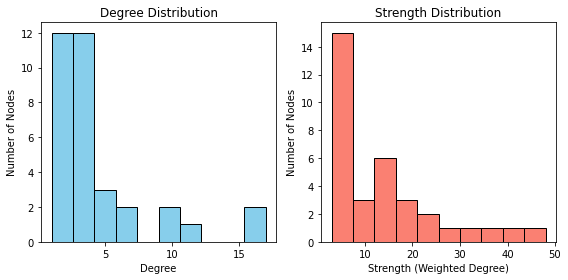

In [28]:
# Compute the degree sequence
degree_sequence = [deg for _, deg in G.degree()]

# Compute the strength (weighted degree) sequence
strength_sequence = [w for _, w in G.degree(weight='weight')]

# Plot histograms
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

# Degree distribution
axs[0].hist(degree_sequence, bins=10, color='skyblue', edgecolor='black')
axs[0].set_title('Degree Distribution')
axs[0].set_xlabel('Degree')
axs[0].set_ylabel('Number of Nodes')

# Strength distribution
axs[1].hist(strength_sequence, bins=10, color='salmon', edgecolor='black')
axs[1].set_title('Strength Distribution')
axs[1].set_xlabel('Strength (Weighted Degree)')
axs[1].set_ylabel('Number of Nodes')

plt.tight_layout()
plt.show()


<h4><font color="magenta">💻 <strong>Exercise:</strong></font></h4>

> Extract basic statistics (mean, median, standard deviation, min, max) from the **degree** and **strength** sequences computed above.  
> Then, test whether each of these distributions follows a **normal distribution** using the **Shapiro-Wilk test**.
>
> - Use `scipy.stats.shapiro` for normality testing.
> - Discuss whether the observed distributions match the expectations for brain networks.

<details>
<summary>💡 <strong>Hint</strong></summary>

- Use `np.mean`, `np.median`, `np.std`, `np.min`, and `np.max` for basic statistics.
- To perform the Shapiro-Wilk test, use:
  ```python
  stat, p_value = stats.shapiro(sequence)
  ```
  If $p < 0.05$: the distribution deviates significantly from normality.

</details> <details> <summary>✅ <strong>Solution</strong></summary>
    
```python
# Basic statistics for degree
print("Degree sequence:")
print(f"- Mean: {np.mean(degree_sequence):.2f}")
print(f"- Median: {np.median(degree_sequence)}")
print(f"- Std: {np.std(degree_sequence):.2f}")
print(f"- Min: {np.min(degree_sequence)}")
print(f"- Max: {np.max(degree_sequence)}")

# Normality test for degree
from scipy import stats
stat_deg, p_deg = stats.shapiro(degree_sequence)
print(f"Shapiro-Wilk p-value (degree): {p_deg:.3f}")

# Basic statistics for strength
print("\nStrength sequence:")
print(f"- Mean: {np.mean(strength_sequence):.2f}")
print(f"- Median: {np.median(strength_sequence):.2f}")
print(f"- Std: {np.std(strength_sequence):.2f}")
print(f"- Min: {np.min(strength_sequence):.2f}")
print(f"- Max: {np.max(strength_sequence):.2f}")

# Normality test for strength
stat_str, p_str = stats.shapiro(strength_sequence)
print(f"Shapiro-Wilk p-value (strength): {p_str:.3f}")
````

<h4><font color="gray">💻 <strong>Optional Exercise:</strong></font></h4>

>Analyze the in- and out-degree sequences of a directed graph:
> - Extract the in- and out-degree sequences.
> - Compute and print the basic statistics: min, max, median, mean, and standard deviation.
> - Visualize the degree distribution using histograms.
> - Create a second plot showing the graph with node size and color proportional to degree.
> - Use `np.sum` to check the general property according to which the sum of in-degrees is equal to the sum of out-degrees.
> - (Math fun !) Prove the previous little math result (lemma) using the adjacency matrix.

<details> <summary>✅ <strong>Solution</strong></summary>
    
```python
in_degree_sequence = [d for n, d in G.in_degree()] # n = node, d = degree
out_degree_sequence = [d for n, d in G.out_degree()]

print(f"Min, max, med, mean, std of in-degree sequence:"
  f"{np.min(in_degree_sequence)}, {np.max(in_degree_sequence)}, {np.median(in_degree_sequence)}, "
  f"{np.mean(in_degree_sequence):.2f}, {np.std(in_degree_sequence):.2f}")
print(f"Min, max, med, mean, std of out-degree sequence:"
  f"{np.min(out_degree_sequence)}, {np.max(out_degree_sequence)}, {np.median(out_degree_sequence)}, "
  f"{np.mean(out_degree_sequence):.2f}, {np.std(out_degree_sequence):.2f}")

# Degrees
def draw_degree_distribution(G, title, ax):
    """
    Plot the degree distribution of a directed graph.

    Parameters:
    - G: NetworkX graph (directed)
    - title: str, the title for the graph
    - ax: Matplotlib axis for the degree distribution
    """
    # In-degrees and out-degrees
    in_degree_sequence = [d for n, d in G.in_degree()]
    out_degree_sequence = [d for n, d in G.out_degree()]

    # Determine the bins
    bins = range(max(max(in_degree_sequence), max(out_degree_sequence)) + 2)  # Ensure all values are included

    # Plot Degree Distribution
    ax.hist(in_degree_sequence, bins=bins, alpha=0.4,
            density=False, edgecolor='black', label='In-degree')
    ax.hist(out_degree_sequence, bins=bins, alpha=0.4,
            density=False, edgecolor='black', label='Out-degree')
    ax.set_title(f'Degree Distribution for {title}')
    ax.set_xlabel('Degree')
    ax.set_ylabel('Count')
    ax.legend()

def draw_graph_with_degree(G, title, ax):
    """
    Draw the directed graph with node sizes proportional to their degree.

    Parameters:
    - G: NetworkX graph (directed)
    - title: str, the title for the graph
    - ax: Matplotlib axis for the graph visualization
    """
    # Position nodes using the spring layout
    pos = nx.spring_layout(G, k=0.6)

    # Calculate node sizes based on degrees
    node_sizes = [30 * np.sqrt(d) for _, d in G.degree()]

    # Calculate node colors based on degrees
    node_degrees = np.asarray([G.degree(n) for n in G.nodes()])
    n_color = node_degrees

    # Draw nodes with sizes and colors based on their degree
    nx.draw_networkx_nodes(G, pos, ax=ax, node_size=node_sizes, node_color=n_color, cmap='Oranges', edgecolors='black', linewidths=1)
    nx.draw_networkx_edges(G, pos, ax=ax, edge_color='grey', alpha=0.4)

    ax.set_title(f'{title} with node size proportional to degree')
    ax.axis('off')

    # Add color bar
    sm = plt.cm.ScalarMappable(cmap='Oranges', norm=plt.Normalize(vmin=min(n_color), vmax=max(n_color)))
    sm.set_array([])
    cbar = plt.colorbar(sm, ax=ax, fraction=0.03, pad=0.04, shrink=0.3)
    cbar.set_label('Node degree')

# Create subplots for degree distributions
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

draw_degree_distribution(G, 'the C. elegans connectome', ax1)

# Create subplots for graph visualizations
draw_graph_with_degree(G, 'C. elegans connectome', ax2)

plt.tight_layout()
plt.show()
```

#### **Degree-preserving random graphs**

Once the degree sequence is known, we can use it to sample **null models**—random graphs that preserve key properties of the observed network, allowing us to test whether other statistics (e.g., clustering, efficiency) are **significantly different** from what would be expected by chance.

This is especially important in neuroscience and other biological domains, where some structural features (like degree heterogeneity) are known to influence many graph measures.

Two common models are:

- **Configuration Model**  
  Generates random graphs that exactly match a given **degree sequence**, but otherwise connect edges randomly. This allows one to isolate the effect of the degree distribution on network measures, without enforcing other properties like clustering or modularity.

- **Directed Configuration Model**  
  Extends the above model to **directed graphs**, preserving both **in-degree** and **out-degree** sequences. This is crucial when directionality carries functional or causal significance (e.g., in neural circuits).

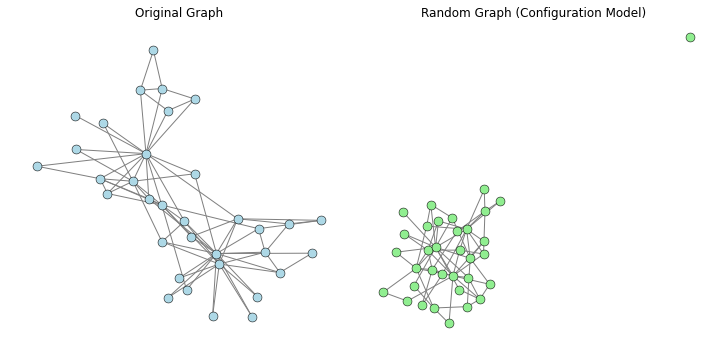

In [29]:
# Generate a random graph with the same degree sequence
degree_sequence = [d for n, d in G.degree()]
random_graph = nx.configuration_model(degree_sequence)

# Convert to simple graph (removes parallel edges and self-loops)
random_graph = nx.Graph(random_graph)
random_graph.remove_edges_from(nx.selfloop_edges(random_graph))

# Create independent layouts
pos_G = nx.spring_layout(G, seed=42)
pos_R = nx.spring_layout(random_graph, seed=24)

# Create figure
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot original graph
nx.draw(G, pos_G, ax=axes[0], node_color='lightblue', edge_color='gray',
        with_labels=False, node_size=80, edgecolors='black', linewidths=0.5)
axes[0].set_title("Original Graph")

# Plot randomized graph
nx.draw(random_graph, pos_R, ax=axes[1], node_color='lightgreen', edge_color='gray',
        with_labels=False, node_size=80, edgecolors='black', linewidths=0.5)
axes[1].set_title("Random Graph (Configuration Model)")

plt.tight_layout()
plt.show()

<h4><font color="magenta">💻 <strong>Exercise:</strong></font></h4>

> - Write a code to check that the **transitivity** of the connectome is higher than that of a graph drawn from the **configuration model** with the same degree sequence.
> - Check that the **densities** of both graphs are approximately the same.

<details>
<summary>💡 <strong>Hint</strong></summary>

- Use `nx.transitivity(G)` to compute the transitivity of a graph.
- Use `nx.density(G)` to compute the density.
- Generate a configuration model with `nx.configuration_model(...)`, then remove self-loops and parallel edges using:
  ```python
  G_random = nx.Graph(G_random)
  G_random.remove_edges_from(nx.selfloop_edges(G_random))

<details> <summary>✅ <strong>Solution</strong></summary>

```python
# Compute transitivity and density of the original graph
T_orig = nx.transitivity(G)
D_orig = nx.density(G)

# Generate a configuration model preserving the degree sequence
degree_sequence = [d for n, d in G.degree()]
G_random = nx.configuration_model(degree_sequence)

# Remove parallel edges and self-loops
G_random = nx.Graph(G_random)
G_random.remove_edges_from(nx.selfloop_edges(G_random))

# Compute transitivity and density of the random graph
T_rand = nx.transitivity(G_random)
D_rand = nx.density(G_random)

# Print results
print(f"Transitivity of original graph: {T_orig:.4f}")
print(f"Transitivity of random graph:   {T_rand:.4f}")
print(f"Density of original graph:      {D_orig:.4f}")
print(f"Density of random graph:        {D_rand:.4f}")

```

<h4><font color="magenta">💻 <strong>Optional Exercise:</strong></font></h4>

> Estimate how **unlikely** it is to observe the transitivity of Zachary’s Karate Club network under a **degree-preserving null model**.
>
> - Generate **1000 random graphs** using the configuration model (undirected or directed, depending on your connectome).
> - For each graph, compute its **transitivity**.
> - Plot the distribution of these transitivity values and indicate the observed value from the connectome in **red**.
> - Estimate the **p-value**: the proportion of null model graphs with transitivity greater than or equal to the observed one.



<details> <summary>✅ <strong>Solution</strong></summary>

```python

# Observed transitivity
T_obs = nx.transitivity(G)

# Degree sequence
degree_sequence = [d for n, d in G.degree()]

# Generate 1000 random graphs and compute their transitivity
transitivities = []

for _ in range(1000):
    G_rand = nx.configuration_model(degree_sequence)
    G_rand = nx.Graph(G_rand)  # Simplify to simple graph
    G_rand.remove_edges_from(nx.selfloop_edges(G_rand))
    
    T_rand = nx.transitivity(G_rand)
    transitivities.append(T_rand)

# Compute p-value
transitivities = np.array(transitivities)
p_value = np.mean(transitivities >= T_obs)

# Plot
plt.figure(figsize=(6, 4))
plt.hist(transitivities, bins=30, edgecolor='black', alpha=0.7)
plt.axvline(T_obs, color='red', linestyle='dashed', linewidth=2, label='Observed transitivity')
plt.xlabel('Transitivity')
plt.ylabel('Frequency')
plt.title('Null distribution of transitivity')
plt.legend()
plt.tight_layout()
plt.show()

print(f"Observed transitivity: {T_obs:.4f}")
print(f"Mean of null distribution: {np.mean(transitivities):.4f}")
print(f"P-value: {p_value:.4f}")

```

### **3.5 Further graph metrics**

#### **3.5.1 Small-world property**

Typically, complex networks are **small-world**. In Network Science, a small-world graph is characterized by **high clustering** (transitivity) and **low average shortest path length**."

The small-worldness coefficient, often denoted as $\sigma$, quantitatively measures whether a network exhibits small-world properties. It is defined as the ratio of the normalized clustering coefficient and the normalized average shortest path length of a network, compared to those of a random network with similar size and degree distribution:
$$ \sigma = \frac{C/C_{rand}}{L/L_{rand}} $$
where:
- $ C $ is the clustering coefficient of the network.
- $ C_{rand} $ is the average clustering coefficient of a set of random networks with the same number of nodes and edges as the original network.
- $ L $ is the average shortest path length of the network.
- $ L_{rand} $ is the average shortest path length of the corresponding random networks.

A value of $\sigma > 1$ suggests that the network exhibits small-world properties, indicating a balance between high local clustering and short global path lengths compared to random networks. Note that $\sigma$ can only be computed for undirected graphs, so if the graph is directed, it must be first symmetrized before using the function `nx.sigma`.

In [30]:
# Function nx.sigma is too slow. New one defined below.
# # Create an undirected version of G
# G_undirected = nx.Graph(G)
# # Compute the small-worldness coefficient
# small_worldness = nx.sigma(G_undirected, niter=100, nrand=10, seed=None)
# # Print the result
# print(f"Small-worldness coefficient: {small_worldness}")


def small_worldness_coefficient(G, n_iter=32):
    """
    Compute the small-worldness coefficient sigma for a graph G.

    Parameters:
    - G: NetworkX graph
    - n_iter: Number of iterations for random graph generation

    Returns:
    - sigma: Small-worldness coefficient
    """
    # Warn and convert to undirected if needed
    if nx.is_directed(G):
        print("Warning: Graph was converted to undirected to compute small-worldness coefficient.")
        G = G.to_undirected()

    # Check if the graph is connected
    if not nx.is_connected(G):
        print("Graph is not connected. Computing for the largest connected component.")
        # Get the largest connected component
        largest_cc = max(nx.connected_components(G), key=len)
        G = G.subgraph(largest_cc).copy()

    # Compute actual sigma
    n = G.number_of_nodes()
    m = G.number_of_edges()

    # Get degrees for the largest connected component
    degree_sequence = [d for n, d in G.degree()]

    # Calculate average shortest path length for the original graph
    L = nx.average_shortest_path_length(G)

    # Compute average shortest path length for configuration model instances
    L_random = 0
    for _ in range(n_iter):
        # Generate configuration model random graph
        G_random = nx.configuration_model(degree_sequence)

        # Convert to simple graph if G_random is a multigraph
        if G_random.is_multigraph():
            G_random = nx.Graph(G_random)

        # Check if the graph is connected
        if not nx.is_connected(G_random):
            print("Generated random graph is not connected. Skipping iteration.")
            continue

        L_random += nx.average_shortest_path_length(G_random) / n_iter

    # Calculate average clustering coefficient for the original graph
    try:
        C = nx.average_clustering(G)
    except nx.NetworkXError:
        print("Error computing average clustering coefficient for original graph.")
        C = 0

    # Compute average clustering coefficient for configuration model instances
    C_random = 0
    for _ in range(n_iter):
        # Generate configuration model random graph
        G_random = nx.configuration_model(degree_sequence)

        # Convert to simple graph if G_random is a multigraph
        if G_random.is_multigraph():
            G_random = nx.Graph(G_random)

        # Check if the graph is connected
        if not nx.is_connected(G_random):
            print("Generated random graph is not connected. Skipping iteration.")
            continue

        try:
            C_random += nx.average_clustering(G_random) / n_iter
        except nx.NetworkXError:
            print("Error computing average clustering coefficient for random graph.")
            continue

    # Compute sigma
    if L_random == 0 or C_random == 0:
        sigma = 0
    else:
        sigma = (C / C_random) / (L / L_random)

    return sigma


sigma = small_worldness_coefficient(G)
print(f"Small-worldness coefficient sigma: {sigma:.3f}")

Generated random graph is not connected. Skipping iteration.
Generated random graph is not connected. Skipping iteration.
Generated random graph is not connected. Skipping iteration.
Generated random graph is not connected. Skipping iteration.
Generated random graph is not connected. Skipping iteration.
Generated random graph is not connected. Skipping iteration.
Generated random graph is not connected. Skipping iteration.
Generated random graph is not connected. Skipping iteration.
Small-worldness coefficient sigma: 2.799


#### **3.5.2 Motifs**

Detecting motifs in complex networks is challenging due to the computational complexity involved in searching for subgraph patterns efficiently. For more robust and scalable motif detection, alternative tools like `graph_tool` in Python offer advanced algorithms and optimizations beyond what is commonly available in NetworkX. Other packages like `igraph` and
`pymfinder` also provide efficient methods for motif discovery in large-scale networks.

#### **3.5.3 Rich-Club Coefficient**
- **Definition**: This measures the tendency of high-degree nodes to be more densely interconnected than expected by chance.
- **Relevance**: In neural networks, a high rich-club coefficient among high-degree nodes suggests a "rich-club" architecture where hub nodes form a cohesive group, crucial for global communication and integration of information.
- **Expectation**: A high rich-club coefficient is expected in brain connectomes, where highly interconnected hub nodes facilitate efficient global integration and coordination across the network.
- **Formula**: The rich-club coefficient is calculated as:
  $$
  \phi(k) = \frac{2E_{>k}}{N_{>k}(N_{>k} - 1)}
  $$
  where $ E_{>k} $ is the number of edges among nodes with degree greater than $ k $, and $ N_{>k} $ is the number of such nodes.

- **Normalization**: To determine whether the observed rich-club coefficient is statistically significant, it should be normalized against a null model. This involves comparing the rich-club coefficient of the actual network to that of a randomized network. The normalized rich-club coefficient is given by:
  $$
  \rho(k) = \frac{\phi(k)}{\phi_{\text{rand}}(k)}
  $$
  where $ \phi_{\text{rand}}(k) $ is the rich-club coefficient of the randomized network. A value of $\rho(k) > 1$ indicates that high-degree nodes are more interconnected than expected by chance, suggesting a significant rich-club organization.

- **Randomized Networks**: To create a meaningful null model, the network is randomized while preserving certain properties, such as the degree distribution. This can be done using methods like degree-preserving randomization or the configuration model. The configuration model generates a randomized network that maintains the same degree sequence as the original network by randomly rewiring edges. This ensures that the observed rich-club phenomenon is not merely a result of the degree distribution but reflects a higher-order organization of the network.

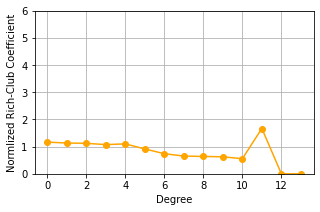

In [31]:
def rich_club_normalized(G, num_randomizations=10):
    """
    Compute the normalized rich-club coefficient of a graph G.

    Parameters:
    - G: NetworkX graph
    - num_randomizations: Number of randomized graphs to generate for averaging

    Returns:
    - normalized_rich_club_coeff: Dictionary keyed by degree with normalized rich-club coefficient values
    """
    # Compute the rich-club coefficients for the original graph
    original_phi = nx.rich_club_coefficient(G, normalized=False)

    # Initialize a dictionary to store the average rich-club coefficients for the randomized graphs
    phi_rand_sum = {k: 0 for k in original_phi.keys()}

    for _ in range(num_randomizations):
        # Create a configuration model graph to preserve the degree distribution
        random_graph = nx.configuration_model([d for n, d in G.degree()])

        # Remove parallel edges and self-loops
        random_graph = nx.Graph(random_graph)
        random_graph.remove_edges_from(nx.selfloop_edges(random_graph))

        # Compute the rich-club coefficients for the randomized graph
        random_phi = nx.rich_club_coefficient(random_graph, normalized=False)

        # Accumulate the rich-club coefficients for averaging
        for k in random_phi.keys():
            phi_rand_sum[k] += random_phi[k]

    # Compute the average rich-club coefficients for the randomized graphs
    phi_rand_avg = {k: phi_rand_sum[k] / num_randomizations for k in phi_rand_sum.keys()}

    # Normalize the rich-club coefficients, avoiding division by zero
    normalized_rich_club_coeff = {}
    for k in original_phi.keys():
        if phi_rand_avg[k] != 0:
            normalized_rich_club_coeff[k] = original_phi[k] / phi_rand_avg[k]
        else:
            normalized_rich_club_coeff[k] = float('inf')  # or you can choose to skip these degrees

    return normalized_rich_club_coeff



# Step 1: Compute the Rich-Club Coefficients
G_undirected = G.to_undirected()
rich_club_coefficient = rich_club_normalized(G_undirected)

# Step 2: Plot the Rich-Club Coefficient
degrees = list(rich_club_coefficient.keys())
coefficients = list(rich_club_coefficient.values())

plt.figure(figsize=(5,3))
plt.plot(degrees, coefficients, marker='o', linestyle='-', color='orange')
plt.ylim(0,6)
plt.xlabel('Degree')
plt.ylabel('Normlized Rich-Club Coefficient')
plt.grid(True)
plt.show()

The first degree for which the rich-club coefficient is larger than 1.2 is: 11

Rich-club nodes (degree >= 11):
 [0, 32, 33]


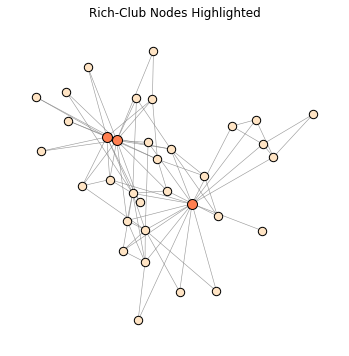

In [32]:
# Step 3: Identify the first degree for which the coefficient is larger than
# the seleted threshold
threshold = 1.2
for degree, coefficient in zip(degrees, coefficients):
    if coefficient > threshold:
        print(f"The first degree for which the rich-club coefficient is larger than {threshold} is: {degree}")
        break


# Step 4: Identify Rich-Club Nodes
degree_threshold = degree # Select a degree threshold, for example, where the rich-club coefficient significantly increases
rich_club_nodes = [node for node, degree in dict(G.degree()).items() if degree >= degree_threshold]

print(f"\nRich-club nodes (degree >= {degree_threshold}):\n", rich_club_nodes)

# Step 5: Plot the original graph with spring layout and highlight the rich-club nodes
# Plot the graph with force-directed info
plt.figure(figsize=(6,6))
pos = nx.spring_layout(G, k=0.5)
nx.draw_networkx_nodes(G, pos, node_size=70, node_color='bisque', edgecolors='black', linewidths=1)
nx.draw_networkx_edges(G, pos, alpha=0.8, edge_color='grey', width=0.6)
nx.draw_networkx_nodes(G, pos, nodelist=rich_club_nodes, node_size=100, node_color='coral', edgecolors='black', linewidths=1)

plt.title('Rich-Club Nodes Highlighted')
plt.axis('off')
plt.show()


#### **3.5.4 Modularity**
   - **Definition**: Modularity quantifies the degree to which the network may be subdivided into clearly defined groups or communities.
   - **Relevance**: High modularity indicates a structure with dense connections between the nodes within modules but sparse connections between nodes in different modules, suggesting specialized processing within tightly knit groups.
   - **Expectation**: High modularity is expected in brain connectomes, where functional segregation into distinct modules supports specialized processing and cognitive functions.
   - **Community Detection Algorithms**: There are many community (module) detection algorithms used to identify these modules within a graph ([Fortunato & Hric 2016](https://doi.org/10.1016/j.physrep.2016.09.002), [Betzel 2023](https://doi.org/10.1016/B978-0-323-85280-7.00016-6)). Two popular ones are:
     - **Greedy Modularity Communities**: This algorithm iteratively merges nodes or smaller communities to maximize modularity, stopping when no further merging increases the modularity score. It can be computationally intensive for large networks.
     - **Louvain Algorithm**: This efficient, two-phase method first assigns each node to its own community and optimizes modularity by moving nodes between communities. It then aggregates the network based on these communities and repeats the process. The algorithm stops when modularity no longer increases. The Louvain algorithm is faster and more scalable, particularly for large networks, due to its hierarchical approach.

The modularity $ Q $ is given by the following equation:
$$ Q = \frac{1}{2m} \sum_{i,j} \left[ A_{ij} - \frac{k_i k_j}{2m} \right] \delta(c_i, c_j) $$
where:
- $ A_{ij} $ is the element of the adjacency matrix $A $.
- $k_i $ and $ k_j $ are the degrees (number of edges) of nodes $ i $ and $ j $, respectively.
- $ m $ is the total number of edges in the network.
- $ \delta(c_i, c_j) $ is the Kronecker delta, which is 1 if nodes $ i $ and $ j $ are in the same community $i.e., $ c_i = c_j $$, and 0 otherwise.
- $ c_i $ and $c_j $ are the communities to which nodes $ i $ and $ j $ belong.

In the code below, we generate and visualize two graphs with different levels of modularity using the Stochastic Block Model (SBM) implemented NetworkX, demonstrating how community structure affects modularity. SBM is a model for generating random graphs with a predefined community structure, where the probability of edge formation depends on the community membership of the nodes.

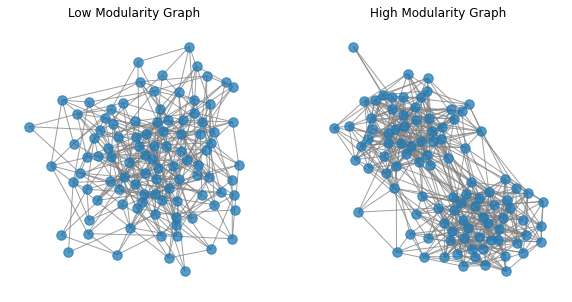

In [33]:
# Two graph generated randomly using SBM
# Define block sizes
n=100
sizes = [50, 50]

# Low modularity SBM graph
p_low = 0.08  # Probability of edges within communities
q_low = 0.08  # Probability of edges between communities
low_modularity_graph = nx.stochastic_block_model(sizes, [[p_low, q_low], [q_low, p_low]])

# High modularity SBM graph
p_high = 0.2
q_high = 0.02
high_modularity_graph = nx.stochastic_block_model(sizes, [[p_high, q_high], [q_high, p_high]])

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(10,5))

# Plot low modularity graph
pos = nx.spring_layout(low_modularity_graph)
nx.draw(low_modularity_graph, pos, ax=axs[0], with_labels=False, node_size=90, edge_color='grey', alpha=0.75)
axs[0].set_title(f'Low Modularity Graph')

# Plot high modularity graph
pos = nx.spring_layout(high_modularity_graph)
nx.draw(high_modularity_graph, pos, ax=axs[1], with_labels=False, node_size=90, edge_color='grey', alpha=0.75)
axs[1].set_title(f'High Modularity Graph')

plt.show()

We now test Louvain and Greedy algoritmms on these two synthetic graphs.

Number of communities: 5
Modularity for the Low modularity using louvain algorithm: 0.31169583262181766

Number of communities: 2
Modularity for the High modularity using louvain algorithm: 0.39979954349041424



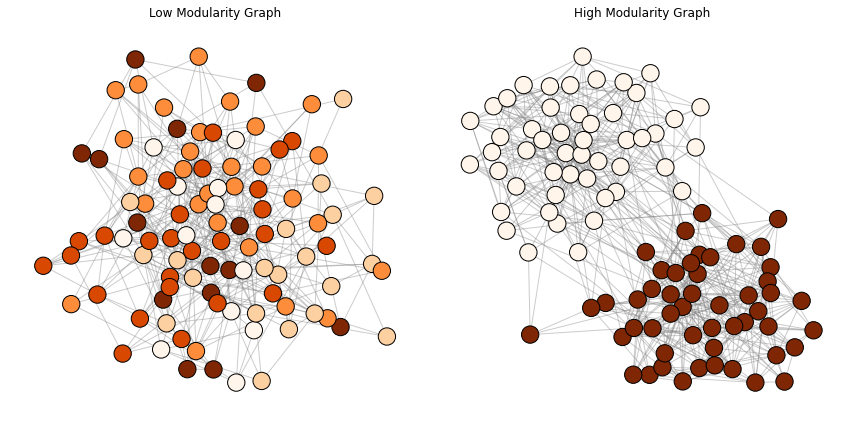

In [34]:
from networkx.algorithms import community
import community.community_louvain as community_louvain #python-louvain package
import warnings

def visualize_modularity(G, title, ax, algorithm='greedy'):
    """
    Visualize the modularity and communities in a graph.

    Parameters:
    - G: NetworkX graph
    - title: str, the title for the graph
    - ax: Matplotlib axis for the graph visualization
    - algorithm: str, the algorithm to use for community detection ('greedy' or 'louvain')
    """
    if algorithm == 'greedy':
        # Identify communities using the greedy modularity communities algorithm
        communities = list(community.greedy_modularity_communities(G))
    elif algorithm == 'louvain':
        if G.is_directed():
            warnings.warn("The Louvain algorithm does not support directed graphs. Converting to undirected graph.")
            G = G.to_undirected()
        # Identify communities using the Louvain algorithm
        partition = community_louvain.best_partition(G)
        print(f"Number of communities: {len(set(partition.values()))}")
        # Create a dictionary to store the communities
        communities = {}
        for node, comm in partition.items():
            communities.setdefault(comm, []).append(node)
        communities = [frozenset(community) for community in communities.values()]
    else:
        raise ValueError("Unsupported algorithm. Use 'greedy' or 'louvain'.")

    # Compute modularity
    modularity = community.modularity(G, communities)
    print(f"Modularity for the {title} using {algorithm} algorithm: {modularity}\n")

    # Create a color map for the communities
    color_map = {}
    for i, community_set in enumerate(communities):
        for node in community_set:
            color_map[node] = i

    # Assign colors to nodes based on their community
    node_colors = [color_map[node] for node in G.nodes()]

    # Position nodes using the spring layout
    pos = nx.spring_layout(G, k=0.4)

    # Draw nodes with community colors
    nx.draw_networkx_nodes(G, pos, ax=ax, node_size=300, cmap=plt.cm.Oranges, node_color=node_colors, edgecolors='black')

    # Draw all edges
    nx.draw_networkx_edges(G, pos, ax=ax, edge_color='grey', alpha=0.4)

    # Draw node labels
    # nx.draw_networkx_labels(G, pos, ax=ax, font_size=10, font_color='black')

    ax.axis('off')  # Hide the axes

    return modularity, node_colors



# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Visualize modularity and communities for the low modularity graph
modularity, node_colors = visualize_modularity(low_modularity_graph, 'Low modularity', ax=axes[0], algorithm='louvain')
axes[0].set_title('Low Modularity Graph')

# Visualize modularity and communities for the high modularity graph
modularity, node_colors = visualize_modularity(high_modularity_graph, 'High modularity', ax=axes[1], algorithm='louvain')
axes[1].set_title('High Modularity Graph')

# Adjust layout
plt.tight_layout()
plt.show()


We're ready to compute the modularity for Zachary's network.

Number of communities: 4
Modularity for the Zachary’s Karate Club network. using louvain algorithm: 0.44490358126721763



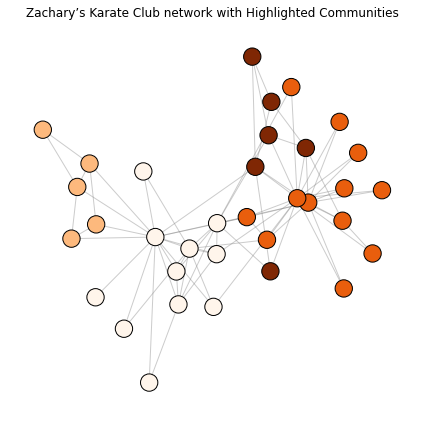

In [35]:
# Create subplots
fig, ax = plt.subplots(figsize=(6, 6))

# Visualize modularity and communities
modularity, node_colors = visualize_modularity(G, 'Zachary’s Karate Club network.', ax=ax, algorithm='louvain')
plt.title('Zachary’s Karate Club network with Highlighted Communities')
plt.tight_layout()
plt.show()

The standard Louvain algorithm, although widely used for community detection, does not perform well on the Zachary’s Karate Club graph—it often fails to recover the known split between the two factions. 

To overcome this limitation, we use a spectral clustering approach. This method begins by computing the eigenvectors of the graph’s Laplacian matrix and uses them to project each node into a low-dimensional space—in this case, two dimensions corresponding to the two largest communities. Once nodes are embedded in this 2D space, a clustering algorithm like 
k-means is applied to identify groups of nodes with similar spectral characteristics, often revealing community structure more effectively than modularity-based methods in small or weakly modular graphs.

This spectral embedding not only provides a basis for clustering but also offers a meaningful visual representation of the graph in two dimensions. Each node is now associated with a 2D coordinate derived from the first two eigenvectors of the normalized Laplacian, capturing important structural features of the graph. By plotting these coordinates, we can visually inspect how well the spectral embedding separates the two factions.

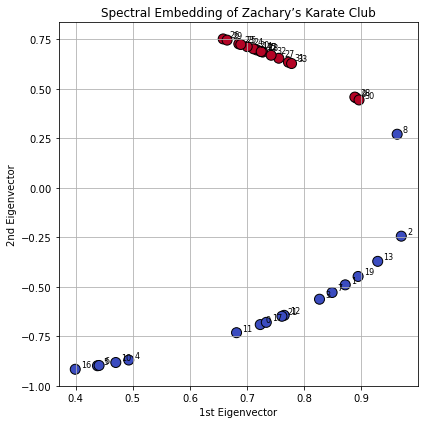

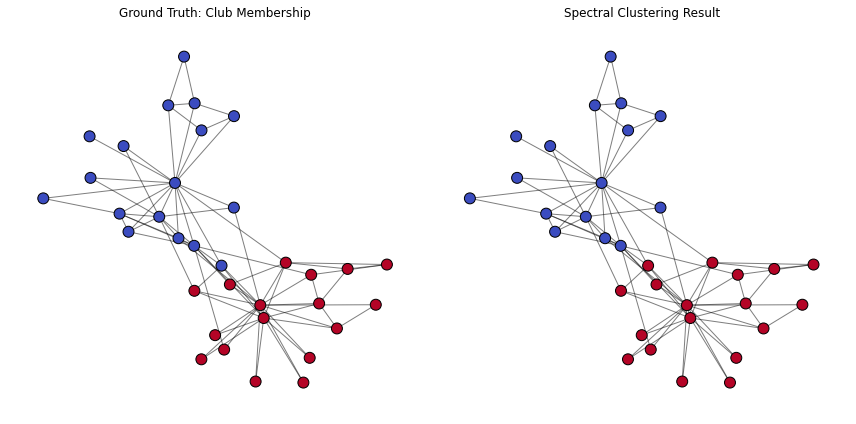

Adjusted Rand Index (ARI): 0.882
Normalized Mutual Information (NMI): 0.837


In [37]:
import numpy as np
import networkx as nx
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from networkx.linalg.laplacianmatrix import normalized_laplacian_matrix
from scipy.cluster.vq import kmeans2

# Load graph
G = nx.karate_club_graph()

# Get ground truth labels from club affiliation
club_labels = np.array([0 if G.nodes[i]['club'] == 'Mr. Hi' else 1 for i in G.nodes])

# Compute normalized Laplacian
L = normalized_laplacian_matrix(G).todense()

# Compute the first k eigenvectors (for k clusters)
k = 2
eigvals, eigvecs = np.linalg.eigh(L)
U = eigvecs[:, :k]  # First k eigenvectors

# Normalize rows of U
U_norm = U / np.linalg.norm(U, axis=1, keepdims=True)

# Visualize the spectral embedding
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.scatter(U_norm[:, 0], U_norm[:, 1], c=club_labels, cmap='coolwarm', edgecolors='black', s=100)
for i, (x, y) in enumerate(U_norm):
    plt.text(x + 0.01, y + 0.01, str(i), fontsize=8)
plt.title('Spectral Embedding of Zachary’s Karate Club')
plt.xlabel('1st Eigenvector')
plt.ylabel('2nd Eigenvector')
plt.grid(True)
plt.tight_layout()
plt.show()

# Run k-means clustering on eigenvector embedding
centroids, labels = kmeans2(U_norm, k=2, minit='++')

# Get ground truth labels from club affiliation
club_labels = np.array([0 if G.nodes[i]['club'] == 'Mr. Hi' else 1 for i in G.nodes])

# Align inferred labels with ground truth
if np.sum(labels == club_labels) < np.sum(labels != club_labels):
    labels = 1 - labels

# Get consistent layout for both plots
pos = nx.spring_layout(G, seed=42)

# Plot side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Ground truth
nx.draw_networkx_nodes(G, pos, node_color=club_labels, cmap='coolwarm', edgecolors='black', node_size=120, ax=axes[0])
nx.draw_networkx_edges(G, pos, alpha=0.5, ax=axes[0])
axes[0].set_title("Ground Truth: Club Membership")
axes[0].axis('off')

# Inferred clusters
nx.draw_networkx_nodes(G, pos, node_color=labels, cmap='coolwarm', edgecolors='black', node_size=120, ax=axes[1])
nx.draw_networkx_edges(G, pos, alpha=0.5, ax=axes[1])
axes[1].set_title("Spectral Clustering Result")
axes[1].axis('off')

plt.tight_layout()
plt.show()


from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

ari = adjusted_rand_score(club_labels, labels)
nmi = normalized_mutual_info_score(club_labels, labels)

print(f"Adjusted Rand Index (ARI): {ari:.3f}")
print(f"Normalized Mutual Information (NMI): {nmi:.3f}")


The Adjusted Rand Index (ARI) and Normalized Mutual Information (NMI) are two standard metrics for comparing the similarity between two partitions (e.g., predicted clusters vs. ground truth). The ARI evaluates how many pairs of nodes are consistently grouped together or apart in both partitions, correcting for chance agreement; it ranges from 0 (random clustering) to 1 (perfect match), and can be negative if the agreement is worse than random. The NMI, rooted in information theory, measures the amount of mutual information shared between the two partitions, normalized to account for differences in their size and number of clusters; it also ranges from 0 (no shared information) to 1 (perfect correspondence). Both are widely used in community detection and clustering validation.

#### **3.5.5 Singular Values and Effective Ranks**

As highlighted in a [recent study](https://www.nature.com/articles/s41567-023-02303-0), the singular values $\sigma_1,\ldots, \sigma_N$ of adjacency matrices in connectomics exhibit rapid decay, indicating a low effective rank.


Singular value decomposition (SVD) is used to compute these values in Python, typically through `numpy.linalg.svd`. The SVD equation is:
$$ A = U \Sigma V^T $$
where $A $ is the adjacency matrix, $ U $ is an orthogonal matrix of left singular vectors, $ \Sigma $ is a diagonal matrix of singular values $ \sigma_i $, and $V^T $is an orthogonal matrix of right singular vectors.

Below, we extract the adjacency matrix of graph $ G $ and compute its singular values. We compare these values with those obtained from randomly generated graphs that preserve the same degrees as $ G $ (using the configuration model). Our analysis reveals that while the singular values of the original graph decrease rapidly, they exhibit a distinct behavior compared to those of randomly generated graphs, highlighting the more complex structure inherent in the original graph.

In [ ]:
import numpy as np

# Step 1: Extract adjacency matrix
if nx.is_directed(G):
    adj_matrix = nx.to_numpy_array(G, weight='weight', dtype=np.float64)
else:
    adj_matrix = nx.to_numpy_array(G, weight=None, dtype=np.float64)

# Step 2: Compute singular values
singular_values = np.linalg.svd(adj_matrix, compute_uv=False)

# Step 3: Plot the scree plot
# Plotting
fig, axs = plt.subplots(1, 2, figsize=(10,5))
# 1st plot
axs[0].plot(range(1, len(singular_values) + 1), singular_values, marker='o', linestyle='-', color='b')
axs[0].set_title('Scree Plot')
axs[0].set_xlabel('Singular Value ID')
axs[0].set_ylabel('Singular Value')
# 2nd plot
max_singular_value = np.max(singular_values)
norm_singular_values = singular_values/max_singular_value
axs[1].plot(range(1, len(singular_values) + 1), norm_singular_values, marker='o', linestyle='-', color='b')
axs[1].set_title('Normalized Scree Plot')
axs[1].set_xlabel('Singular Value ID')
axs[1].set_ylabel('Normalized Singular Value')
plt.show()

In [ ]:
def generate_random_graph_svd(G, num_random_graphs=100):
    """Generate random graphs from configuration model and compute their singular values."""
    singular_values_list = []

    for _ in range(num_random_graphs):
        if nx.is_directed(G):
            # Extract in-degree and out-degree sequences
            in_degree_sequence = [d for n, d in G.in_degree()]
            out_degree_sequence = [d for n, d in G.out_degree()]

            G_random = nx.directed_configuration_model(in_degree_sequence, out_degree_sequence, create_using=nx.DiGraph())
        else:
            # Extract degree sequence for undirected graph
            degree_sequence = [d for n, d in G.degree()]

            G_random = nx.configuration_model(degree_sequence, create_using=nx.Graph())

        # Extract adjacency matrix
        adj_matrix_random = nx.to_numpy_array(G_random, weight='weight' if G.is_directed() else None, dtype=np.float64)

        # Compute singular values and collect them
        singular_values = np.linalg.svd(adj_matrix_random, compute_uv=False)
        singular_values_list.append(singular_values)

    # Compute mean of singular values across all random graphs
    mean_singular_values = np.mean(singular_values_list, axis=0)
    return mean_singular_values

# Step 3: Generate random graphs and compute mean singular values (defaulting to 100 random graphs)
mean_singular_values = generate_random_graph_svd(G, num_random_graphs=10)

#. Step 4: Normalize mean singular values
max_mean_singular_value = np.max(mean_singular_values)
norm_mean_singular_values = mean_singular_values/max_mean_singular_value

In [ ]:
# Plotting
fig, axs = plt.subplots(1, 1, figsize=(5,5))
# Plot mean scree plot of random graphs
axs.plot(range(1, len(mean_singular_values) + 1), norm_mean_singular_values, marker='s', linestyle='--', color='r', label='Mean of Random Graphs')
# Plot original graph's scree plot
axs.plot(range(1, len(singular_values) + 1), norm_singular_values, marker='o', linestyle='-', color='b', label='Original Graph')
axs.set_title('Normalized Scree Plot Comparison')
axs.set_xlabel('Singular Value ID')
axs.set_ylabel('Normalized Singular Value')
axs.legend()
plt.show()

<font color="magenta">**Exercise**</font>
To better understand the role of the largest singular values, compare the normalized singular values of `low_modularity_graph`and `high_modularity_graph`.

We now compute some effective ranks and show that they are all much smaller than the actual rank.

## <font color="blue"> **3. Software Tools for Network Analysis** </font>

A variety of open-source tools are available to support network analysis across disciplines, including social sciences, health, and neuroscience:

### 🐍 Python-based Tools

- **[NetworkX](https://networkx.org/)**  
  A user-friendly Python library for building, analyzing, and visualizing graphs. Excellent for teaching and small to mid-sized networks.

- **[graph-tool](https://graph-tool.skewed.de/)**  
  A high-performance Python library for advanced network modeling and analysis. Linked to the large empirical network repository [Netzschleuder](https://networks.skewed.de/).

- **[bctpy](https://github.com/aestrivex/bctpy)**  
  Python implementation of the Brain Connectivity Toolbox (BCT), popular in neuroscience for computing measures of brain network organization.

- **[pyspi](https://github.com/DynamicsAndNeuralSystems/pyspi)**  
  A Python package for inferring functional connectivity using methods like Granger causality and transfer entropy.

---

### 📊 R-based Tools

- **[igraph (R and Python)](https://igraph.org/)**  
  A powerful and flexible package for network analysis and visualization. Available in both R and Python.

- **[statnet](https://statnet.org/)**  
  A suite of R packages for advanced statistical modeling of social networks, including exponential random graph models (ERGMs) and dynamic networks.

---

### 🎨 Visual and Qualitative Platforms

- **[Gephi](https://gephi.org/)**  
  A visual, interactive platform for exploratory network analysis. Ideal for mapping and presenting social networks or relational data qualitatively. Especially useful when coding and programming are not required.

- **[Cytoscape](https://cytoscape.org/)**  
  Another graphical tool initially developed for biological networks, but often used in health and social sciences for visually rich network exploration.

---

These tools support a range of use cases—from qualitative exploration to advanced statistical inference—and can be adapted to the needs of researchers in the social sciences, public health, and neuroscience.
